## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
yelp_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp_data_sentiment.csv')
yelp_data.head()

,Name,Review,Polarity,Sentiment,chocol,cup,amaz,eat,year,alway,...,turnt,twoiv,combowhich,fishscallopscalamarishrimpfri,quicki,goesnic,outsidehad,perfections,trueif,fashionth
0,Morris Park Bake Shop,'The chocolate cups are amazing! Have been eat...,0.500000,Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Morris Park Bake Shop,'Morris Park Bake Shop has become my go to spo...,0.338889,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Morris Park Bake Shop,'I thought the cookies and biscotti were prett...,0.314583,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Morris Park Bake Shop,'Guys.... so Im a big time biscotti connoisseu...,0.238068,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Morris Park Bake Shop,'I had a craving for a special type of cake wi...,0.314643,Slightly Positive,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 2: Machine Learning Models with Bag of Words<a id='Part2'></a>

In [6]:
# new pure text based dataset

X = yelp_data.Review
y = yelp_data.Sentiment
indices = yelp_data.index

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# same split, size and random state
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)

### Naive Bayes with CountVectorizer<a id='NB_CV'></a>

Now we're going to test two classification methods with two different text vectorizers to get the best result, first we'll do Naive Bayes with CV and TFIDF

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 1, 'vec__min_df': 10}

In [10]:
import pickle
filename = 'nb_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

In [11]:
filename = 'nb_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [12]:
results = clf.predict(X_test)

In [13]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.6010054844606947
F1 Score (macro):  0.6074491629759009
F1 Score (micro):  0.6010054844606947
F1 Score (weighted):  0.6003132022894251


In [14]:
nb_cv_acc = test_accuracy
nb_cv_f1 = f1_accuracy
nb_cv_f1m = f1_accuracym
nb_cv_f1w = f1_accuracyw

### Naive Bayes with TFIDF<a id='NB_TF'></a>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.1, 'vec__min_df': 10}

In [16]:
filename = 'nb_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [17]:
filename = 'nb_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [18]:
results = clf.predict(X_test)

In [19]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.5795246800731262
F1 Score (macro):  0.567357556478225
F1 Score (micro):  0.5795246800731262
F1 Score (weighted):  0.5733472940667754


In [20]:
nb_tf_acc = test_accuracy
nb_tf_f1 = f1_accuracy
nb_tf_f1m = f1_accuracym
nb_tf_f1w = f1_accuracyw

### Results<a id='Results2'></a>

In [21]:
result2 = pd.DataFrame({'Model':['NB_CV', 'NB_TF'],
             'Accuracy':[nb_cv_acc, nb_tf_acc,]})
result2 = result2.round(3)
result2

,Model,Accuracy
0,NB_CV,0.601
1,NB_TF,0.580


In this case, the Naive Bayes CV is the best choice. 

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test), labels=None, sample_weight=None)
cm

array([[144,   0, 137,  21],
       [  2, 189,  23, 248],
       [ 26,   8, 306, 253],
       [  7,  68, 127, 629]])

In [23]:
cm_df =  pd.DataFrame(cm, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])

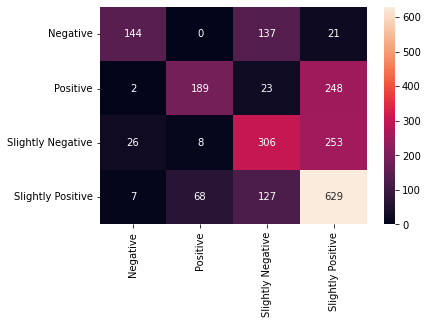

In [24]:
import seaborn as sns
sns.heatmap(cm_df, annot=True,fmt='g')